## Data Cleaning

In [1]:
# import all the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Admin\AppData\Local\Temp\ipykernel_34632\576107218.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
"""TO READ FILE"""
import os
#os.chdir(r"C:\Users\Deonne\OneDrive - Nanyang Technological University\Desktop\Y2S1\Biohackathon")
#os.chdir(r"path")
print("Current working directory is:", os.getcwd())

Current working directory is: c:\Users\Admin\Documents\GitHub\Cervical-Cancer-bioh8ckers


In [3]:
# reading the data
cc_data = pd.read_csv("cervical-cancer_csv.csv")

In [4]:
cc_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [5]:
cc_data.shape

(835, 36)

In [6]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-n

In [7]:
cc_data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

Meaning of the columns:

In [8]:
# checking for any NULL values
cc_data.isna().any()

Age                                   False
Number of sexual partners              True
First sexual intercourse               True
Num of pregnancies                     True
Smokes                                 True
Smokes (years)                         True
Smokes (packs/year)                    True
Hormonal Contraceptives                True
Hormonal Contraceptives (years)        True
IUD                                    True
IUD (years)                            True
STDs                                   True
STDs (number)                          True
STDs:condylomatosis                    True
STDs:cervical condylomatosis           True
STDs:vaginal condylomatosis            True
STDs:vulvo-perineal condylomatosis     True
STDs:syphilis                          True
STDs:pelvic inflammatory disease       True
STDs:genital herpes                    True
STDs:molluscum contagiosum             True
STDs:AIDS                              True
STDs:HIV                        

CLEAN DATA BASED ON COLUMN TYPE

In [9]:
binary_cols = [
    'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs',
    'STDs:condylomatosis', 'STDs:cervical condylomatosis',
    'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
    'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
    'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx',
    'Hinselmann', 'Schiller', 'Citology', 'Biopsy'
]

duration_cols = [
    'Smokes (years)', 'Smokes (packs/year)',
    'Hormonal Contraceptives (years)', 'IUD (years)',
    'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'
]

num_cols = [
    'Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
    'STDs (number)', 'STDs: Number of diagnosis'
]

try:
    cc_data[binary_cols] = cc_data[binary_cols].fillna(0)
    cc_data[duration_cols] = cc_data[duration_cols].fillna(0)

    # Fill numerical columns with median 
    for col in num_cols:
        if col in cc_data.columns:
            cc_data[col].fillna(cc_data[col].median())

    # shows unique values of isna, will show if there are still columns with missing values
    print(cc_data.isna().any().unique())

except Exception as e:
    # exception handling
    print(f"An error occurred while filling missing data: {e}")

[False  True]


In [14]:
# finding duplicated data
dup = cc_data.duplicated().sum()
print(f"Number of duplicated rows: {dup}")

# dropping duplicates
cc_data.drop_duplicates(inplace=True)

Number of duplicated rows: 0


In [15]:
unique_values = cc_data.apply(lambda x: x.unique())
print(unique_values)

Age                                   [18, 15, 34, 52, 46, 42, 51, 26, 45, 44, 27, 4...
Number of sexual partners             [4.0, 1.0, 5.0, 3.0, 2.0, 6.0, nan, 7.0, 15.0,...
First sexual intercourse              [15.0, 14.0, nan, 16.0, 21.0, 23.0, 17.0, 26.0...
Num of pregnancies                    [1.0, 4.0, 2.0, 6.0, 3.0, 5.0, nan, 8.0, 7.0, ...
Smokes                                                                       [0.0, 1.0]
Smokes (years)                        [0.0, 37.0, 34.0, 1.266972909, 3.0, 12.0, 18.0...
Smokes (packs/year)                   [0.0, 37.0, 3.4, 2.8, 0.04, 0.5132021277, 2.4,...
Hormonal Contraceptives                                                      [0.0, 1.0]
Hormonal Contraceptives (years)       [0.0, 3.0, 15.0, 2.0, 8.0, 10.0, 5.0, 0.25, 7....
IUD                                                                          [0.0, 1.0]
IUD (years)                           [0.0, 7.0, 5.0, 8.0, 6.0, 1.0, 0.58, 2.0, 19.0...
STDs                            

from the unique values above, we can see that columns `STDs:condylomatosis` and `STDs:AIDS` only have the unique value of `0`. Thus their correlation cannot be plotted in the heatmap as shown below

# EDA (Exploratory Data Analysis)

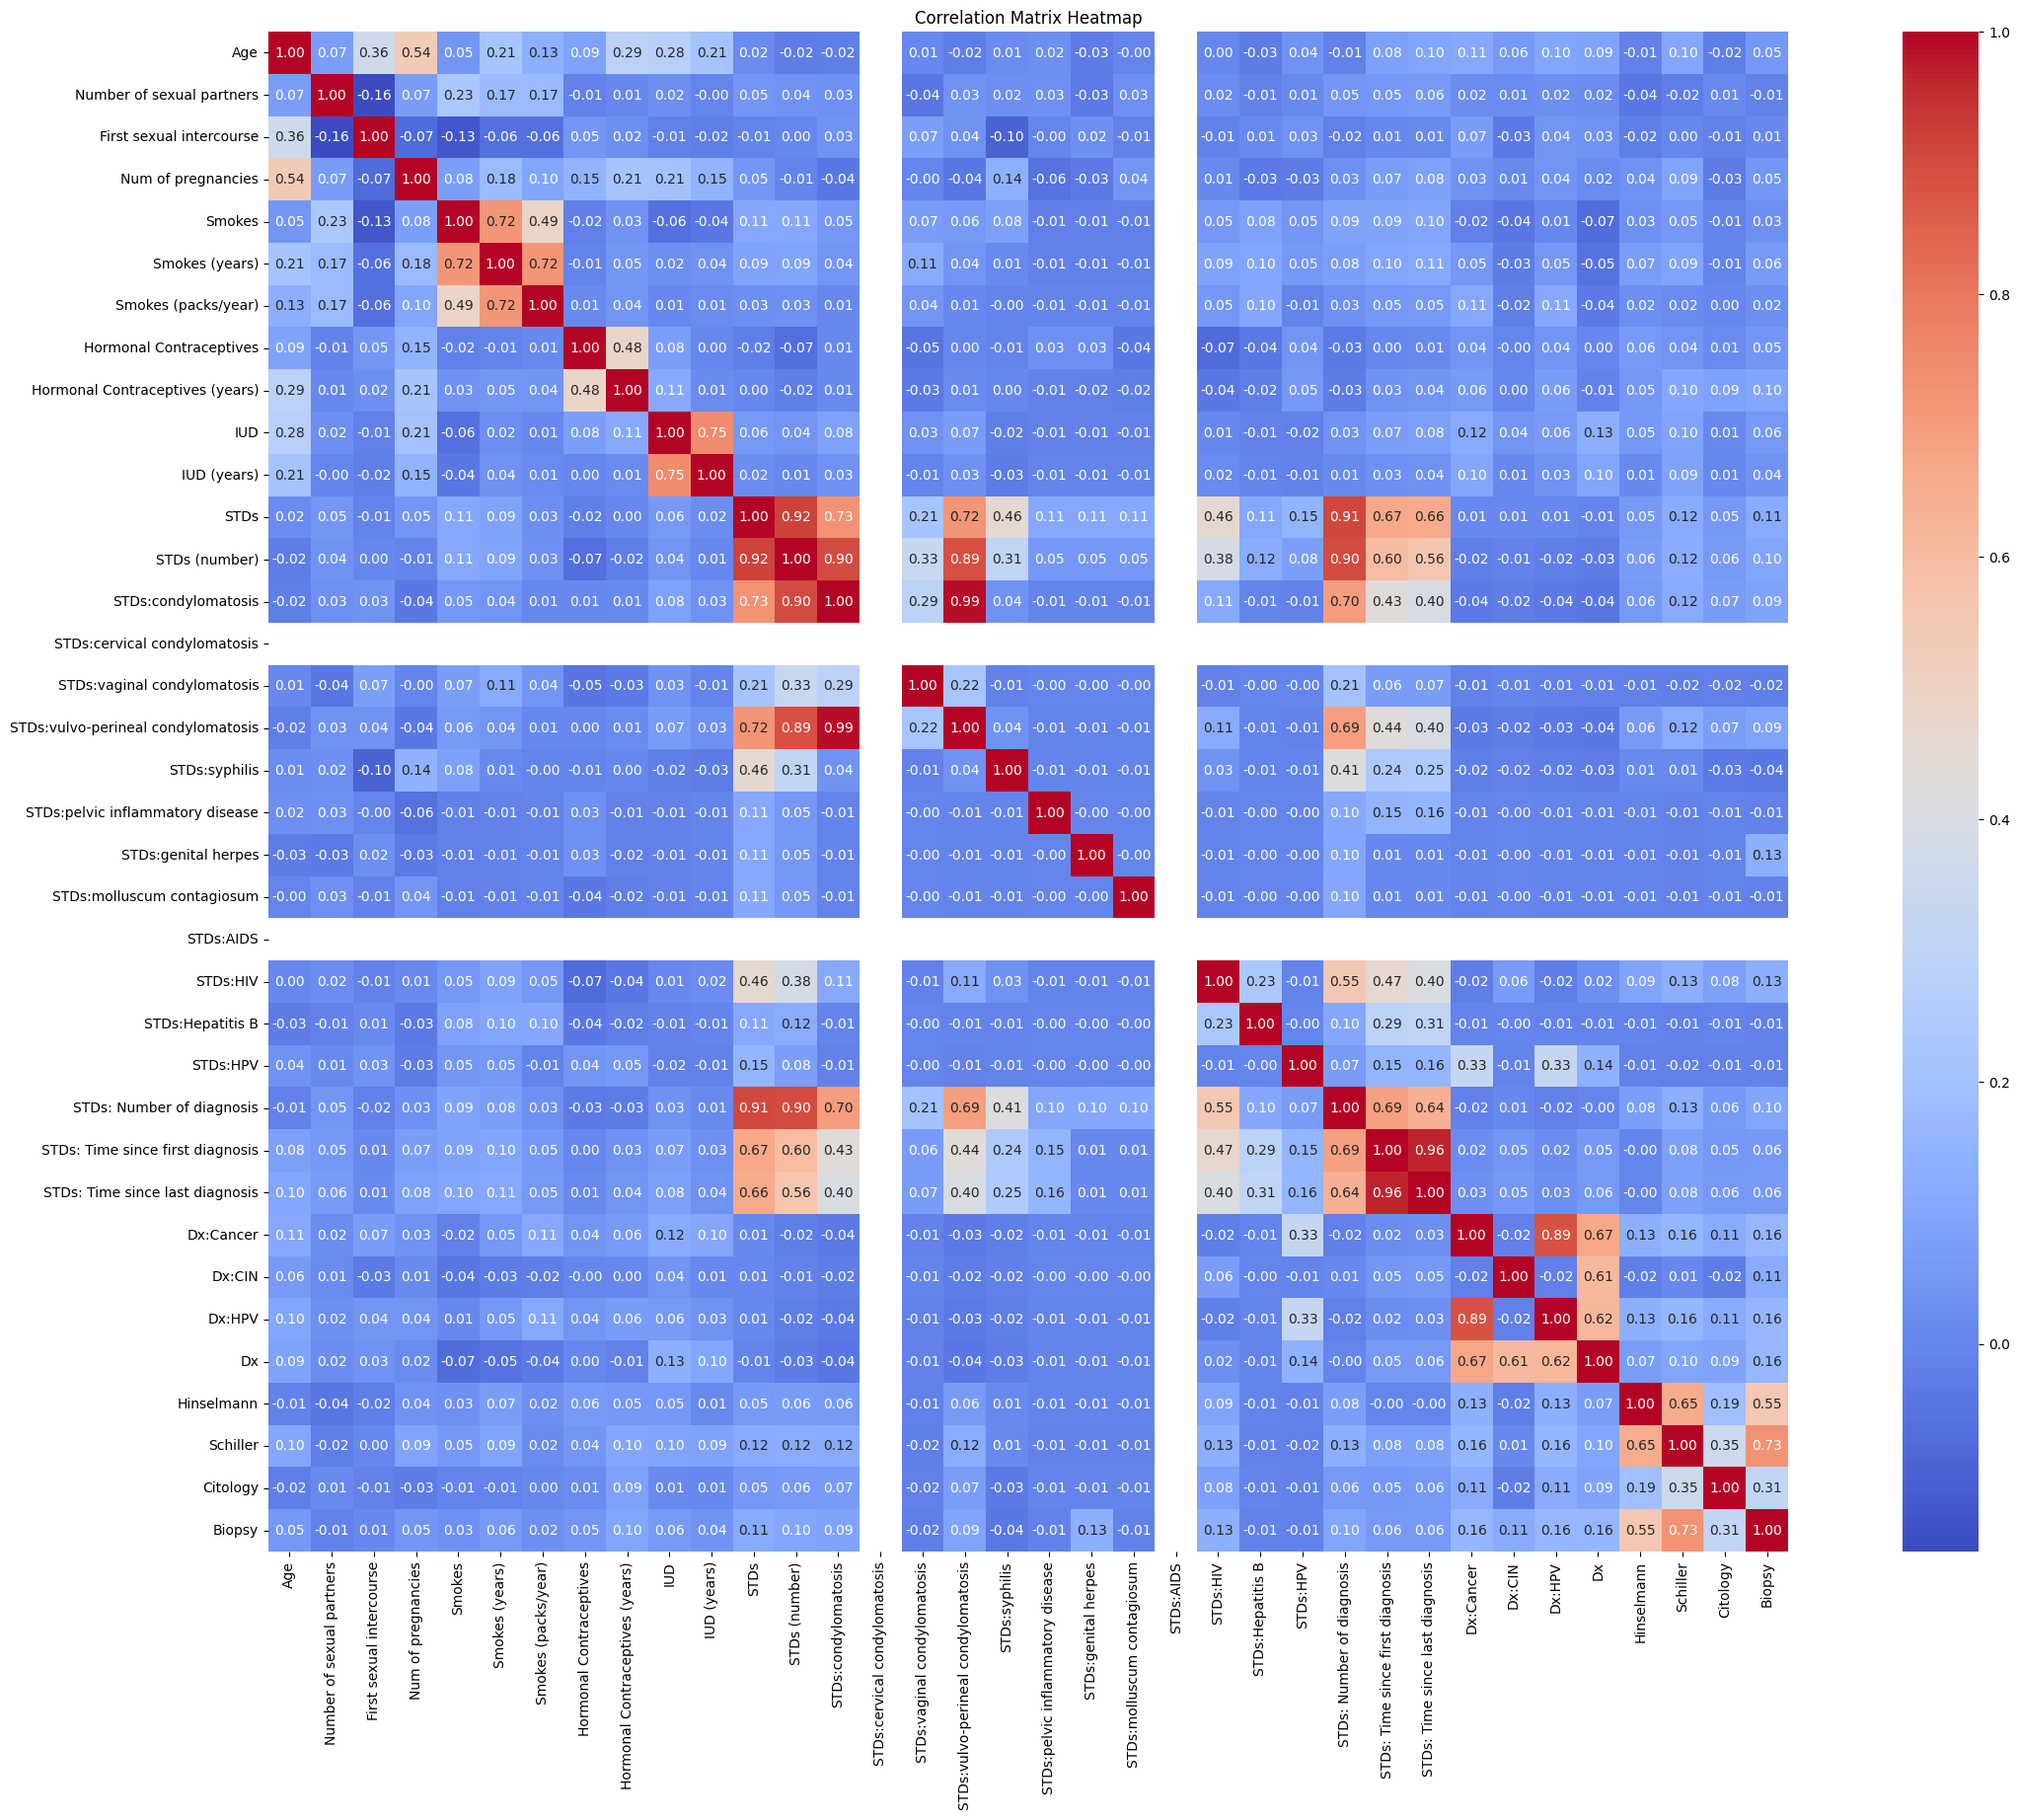

In [20]:
# plotting correlation matrix (determining the weight of each factor)

corr = cc_data.corr()

# Plot heatmap
plt.figure(figsize=(30,20))
sns.heatmap(
    corr,
    annot=True,       # Show numbers
    cmap="coolwarm",  # Color map
    fmt=".2f",        # Format numbers to 2 decimals
    mask=None,        # Do NOT hide upper/lower triangle
    cbar=True,        # Show color bar
    square=True      # Make cells square for readability
)
plt.title("Correlation Matrix Heatmap")
plt.show()

observing the correlation heatmap, we are only focusing on the `Dx:Cancer` column as it is the target variable that we are using 

possible columns to use: (closer to 1 the better)
- `Dx:HPV` - 0.89 
- `Dx` - 0.67 
- `STD:HPV` - 0.33

From these columns, we can observe that HPV is highly correlated to the cancer outcome